# An Introduction to Python for Data Analysis

## Part 1: Python Fundamentals

To be able to carry out sophisticated data analyses, we must first understand the Python programming language and its fundamental constructs.

### Variables

A variable serves as a named storage location for data values, allowing for data to be labeled and referenced throughout a program. A value is assigned to a variable using the equals operator (=). Each value has an intrinsic data type, such as integer, float, or string, which dictates the kinds of operations that can be performed on it.

In [20]:
# An integer (whole number) for discrete counts
number_of_students = 25

# A float (number with a decimal) for continuous measurements
average_score = 88.5

# A string (text), enclosed in quotation marks
course_name = "Introduction to Data Science"

# A list (an ordered, mutable collection of items)
student_names = ["Alice", "Bob", "Charlie"]

In [21]:
# The contents of a variable can be displayed using the print() function
print("Course Name:", course_name)
print("Student Roster:", student_names)

Course Name: Introduction to Data Science
Student Roster: ['Alice', 'Bob', 'Charlie']


### Indexing

Elements within ordered sequences (lists, arrays) can be accessed by using an index that points to the location of individual elements within the sequence. Python is a 0-indexed language, meaning that the first position of an ordered sequence is accessed with `0`.

In [44]:
# Access the first element in the list (at index 0)
first_student = student_names[0]
print("The first student is:", first_student)

# Access the third element in the list (at index 2)
third_student = student_names[2]
print("The third student is:", third_student)

# Negative indexing can also be used, which counts from the end of the list.
# -1 refers to the last element, -2 to the second-to-last, etc.
last_student = student_names[-1]
print("The last student is:", last_student)

# Sublists can be created using slicing, which is done with a colon (:)
first_two_students = student_names[0:2]  # Gets the first two students
print("The first two students are:", first_two_students)

last_two_students = student_names[-2:]  # Gets the last two students
print("The last two students are:", last_two_students)

The first student is: Alice
The third student is: Charlie
The last student is: Charlie
The first two students are: ['Alice', 'Bob']
The last two students are: ['Bob', 'Charlie']


### Conditional Logic: if, elif, else

Conditional logic facilitates the execution of specific code blocks contingent upon the evaluation of one or more boolean conditions. This sequential evaluation mechanism enables complex decision-making within a program.

`if`: Evaluates the primary condition. If true, the associated code block is executed, and the chain is exited.

`elif`: (an abbreviation of "else if") If the preceding if or elif condition evaluates to false, this next condition is checked. The program proceeds down the chain until a condition is met.

`else`: If all preceding if and elif conditions evaluate to false, this final code block is executed by default.

In [ ]:
score = 78 # Play with this value to see how it affects the output

if score >= 90:
    print("Grade: A")
elif score >= 80:
    print("Grade: B") # The program stops here, as 78 is not >= 80.
elif score >= 70:
    print("Grade: C") # This condition is met, so "Grade: C" is printed.
else:
    print("Grade: D or F") # This block is skipped because a prior condition was true.

Grade: C


### for Loops

A for loop is employed to iterate over a sequence (such as a list, string, or range of numbers) and execute a defined action for each element. This structure is fundamental for performing repetitive tasks efficiently and systematically, allowing us to automate processes that would be tedious and error-prone if performed manually.

In [23]:
# The following loop iterates through the previously defined list of student names.

# For each pass of the loop, the variable 'name' will hold the next element from the list.
for name in student_names:
    print("Sending welcome email to:", name)

# This will print the message three times, once for each name in the list.

Sending welcome email to: Alice
Sending welcome email to: Bob
Sending welcome email to: Charlie


## Setting Up for Data Analysis

The initial step in any reproducible data analysis workflow involves importing the required libraries, which provide pre-written code for specialized tasks.

### Loading the Iris Dataset

This tutorial utilizes the canonical "Iris" dataset from the scikit-learn library, a premier tool for machine learning in Python. This dataset contains measurements for 150 iris flower specimens from three distinct species. The data is loaded and then converted into a Pandas DataFrame, a two-dimensional, size-mutable, and heterogeneous tabular data structure with labeled axes (rows and columns), which is the principal object for analytical tasks in Python.

In [35]:
# Import the necessary libraries, assigning standard aliases for brevity
# You need to refer to aliases to call functions from these libraries.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Load the Iris dataset object from scikit-learn
# Manipulation to turn it into a tidy Pandas DataFrame -- ignore the following lines
df = load_iris(as_frame=True)
df_iris = df.frame.copy()
df_iris["species"] = df.target.map(
    {0: "setosa", 1: "versicolor", 2: "virginica"}
)
# remove the target column
df_iris.drop(columns=["target"], inplace=True)
del df

### Pandas for Data Exploration

Pandas is a cornerstone library for managing, cleaning, and manipulating tabular data - "data wrangling". The df_iris variable holds an instance of a Pandas DataFrame, which is now ready for exploration.

#### Exploring the DataFrame

Several functions are available to obtain a high-level summary of the data, which is a critical first step in any analysis.

Note that a function other than print, `display`, is used in the following code block. `display` is a IPython (interactive Python / e.g. Jupyter notebook) function that prints dataframes in a visually appealing and easier-to-read format.

In [36]:
# Display the first 5 rows of the DataFrame using .head() to get a quick sample of the data.
print("--- First 5 Rows ---")
display(df_iris.head())

# Use .info() to generate a concise summary of the DataFrame, including data types and non-null counts.
# This is particularly useful for identifying missing data (where non-null count is less than the total entries).
print("\n--- DataFrame Info ---")
print(df_iris.info())

# Use .describe() to compute a statistical summary of the numerical columns.
# This includes count, mean, standard deviation, and the five-number summary (min, 25th, 50th, 75th percentiles, and max).
print("\n--- Statistical Summary ---")
display(df_iris.describe())


--- First 5 Rows ---


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa



--- DataFrame Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None

--- Statistical Summary ---


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Selecting Columns

Specific columns within the DataFrame can be isolated for focused analysis. This is achieved by referencing the column name(s) within square brackets.


In [38]:
# Selecting a single column returns a one-dimensional Pandas Series object.
sepal_lengths = df_iris['sepal length (cm)']
print("\n--- Sepal Length Column (Pandas Series) ---")
display(sepal_lengths.head())

# Selecting multiple columns requires passing a list of column names.
# This returns a new, two-dimensional DataFrame object containing only the specified columns.
sepal_info = df_iris[['sepal length (cm)', 'sepal width (cm)', 'species']]
print("\n--- Sepal Info (Pandas DataFrame) ---")
display(sepal_info.head())


--- Sepal Length Column (Pandas Series) ---


0    5.1
1    4.9
2    4.7
3    4.6
4    5.0
Name: sepal length (cm), dtype: float64


--- Sepal Info (Pandas DataFrame) ---


,sepal length (cm),sepal width (cm),species
0,5.1,3.5,setosa
1,4.9,3.0,setosa
2,4.7,3.2,setosa
3,4.6,3.1,setosa
4,5.0,3.6,setosa


### Subsetting Data with Boolean Conditions
Beyond selecting columns by name, a more powerful technique is to filter rows based on specific conditions. This is often referred to as boolean indexing. The process involves creating a sequence of True and False values (a boolean Series) where True corresponds to the rows you want to keep. This boolean Series is then used inside the square brackets to return a new DataFrame containing only the rows that met the condition.

In [45]:
# Create a boolean condition to find all flowers of the 'setosa' species.
# This operation returns a Series of True/False values.
is_setosa = df_iris['species'] == 'setosa'
print("--- Boolean Series for 'setosa' ---")
display(is_setosa.head())

# Use this boolean Series to filter the DataFrame.
setosa_df = df_iris[is_setosa]
print("\n--- DataFrame containing only setosa species ---")
display(setosa_df.head())
print(f"Original DataFrame length: {len(df_iris)}, Filtered DataFrame length: {len(setosa_df)}")


# Conditions can also be combined. Let's find all 'virginica' flowers with a petal width greater than 2.0 cm.
# Use '&' for AND, and '|' for OR. Each condition must be in parentheses.
virginica_large_petal = (df_iris['species'] == 'virginica') & (df_iris['petal width (cm)'] > 2.0)

large_virginica_df = df_iris[virginica_large_petal]
print("\n--- DataFrame of virginica with large petals ---")
display(large_virginica_df.head())

--- Boolean Series for 'setosa' ---


0    True
1    True
2    True
3    True
4    True
Name: species, dtype: bool


--- DataFrame containing only setosa species ---


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Original DataFrame length: 150, Filtered DataFrame length: 50

--- DataFrame of virginica with large petals ---


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
100,6.3,3.3,6.0,2.5,virginica
102,7.1,3.0,5.9,2.1,virginica
104,6.5,3.0,5.8,2.2,virginica
105,7.6,3.0,6.6,2.1,virginica
109,7.2,3.6,6.1,2.5,virginica


## NumPy for Numerical Operations

NumPy (Numerical Python) is the fundamental package for scientific and numerical computing in Python. Its primary object is the n-dimensional array, which offers significant performance advantages over standard Python lists for mathematical operations due to its implementation in C and contiguous memory storage. Unlike usual Python code, NumPy operations can leverage multiple threads through the C implementation.

A NumPy array can be created directly from a DataFrame column.

In [ ]:
# Extract the petal lengths as a NumPy array for efficient computation.
petal_lengths_array = np.array(df_iris['petal length (cm)'])

NumPy functions can then be applied to these arrays to perform aggregate statistical calculations. The syntax `np.function_name(variable_holding_an_array)` provides a clear and readable approach to these operations.


In [ ]:
# Calculate the sum of all petal lengths
total_petal_length = np.sum(petal_lengths_array)
print(f"Sum of all petal lengths: {total_petal_length:.2f} cm")

# Calculate the average (mean) petal length
mean_petal_length = np.mean(petal_lengths_array)
print(f"Average petal length: {mean_petal_length:.2f} cm")

# Find the maximum petal length
max_petal_length = np.max(petal_lengths_array)
print(f"Maximum petal length: {max_petal_length:.2f} cm")

# Find the minimum petal length
min_petal_length = np.min(petal_lengths_array)
print(f"Minimum petal length: {min_petal_length:.2f} cm")

# Calculate the standard deviation, a measure of the amount of variation or dispersion of the data values.
std_dev_petal_length = np.std(petal_lengths_array)
print(f"Standard deviation of petal length: {std_dev_petal_length:.2f} cm")

## Seaborn for Data Visualization

Data visualization is crucial for exploratory data analysis, as it can reveal patterns, trends, and anomalies that are not apparent from summary statistics alone.

Seaborn is a high-level data visualization library based on matplotlib that provides a declarative interface for creating informative and aesthetically pleasing statistical graphics.

### Creating a Scatter Plot

A scatter plot is a visualization used to examine the relationship or correlation between two continuous numerical variables. In this example, the hue parameter is utilized to encode a third, categorical variable—the flower species—using color. This allows for the simultaneous investigation of relationships both within and between groups.

### Creating a Box Plot
A box plot offers a standardized method for displaying the distribution of a numerical variable across different categories. It visualizes the five-number summary: the box represents the interquartile range (IQR, from the 25th to 75th percentile), the line inside the box marks the median (50th percentile), and the "whiskers" typically extend to show the range of the data, excluding outliers.


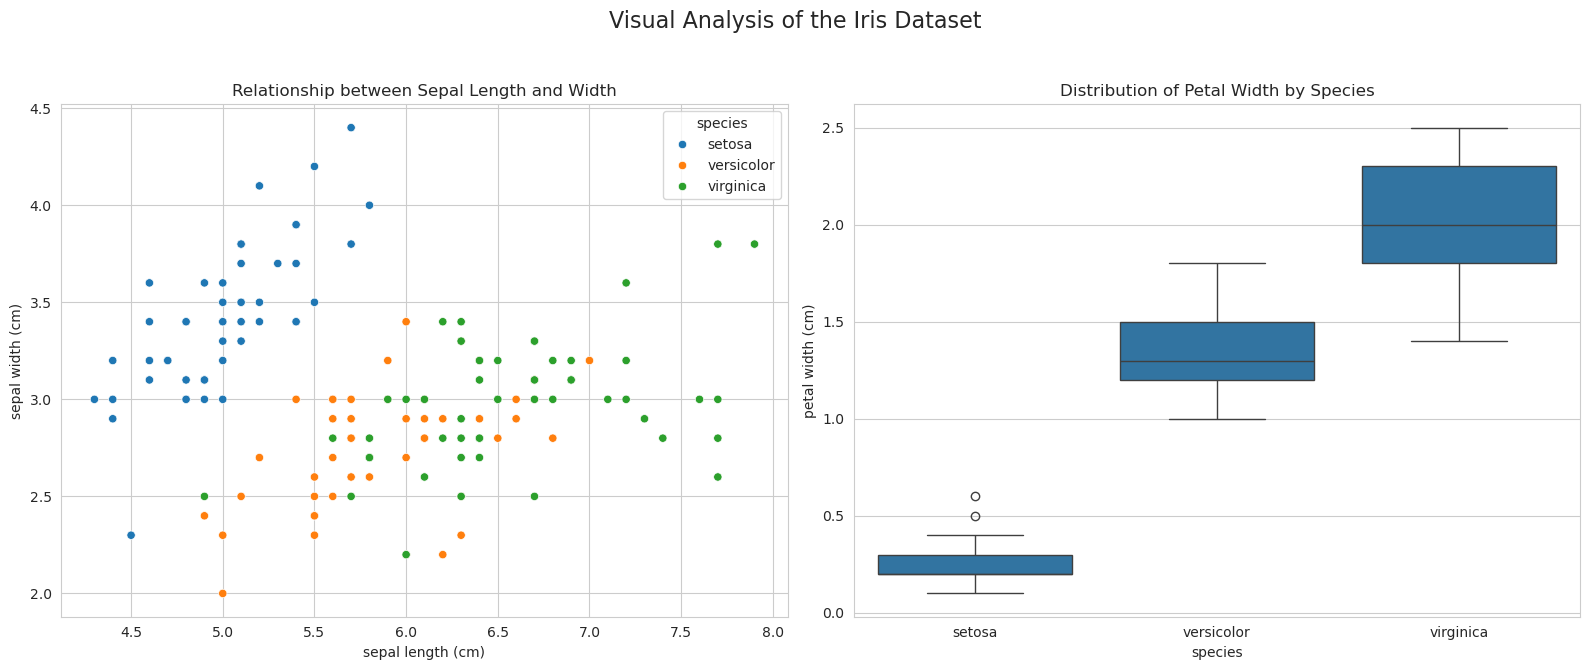

In [42]:
# Set a professional and clean style for the plots.
sns.set_style("whitegrid")

# Create a figure and a set of subplots. 
# plt.subplots(1, 2, ...) creates a figure with 1 row and 2 columns of subplots.
# The `figsize` argument controls the overall dimensions of the figure.
fig, axes = plt.subplots(1, 2, figsize=(16, 7))

# Add a main title for the entire figure for overall context.
fig.suptitle('Visual Analysis of the Iris Dataset', fontsize=16)

# --- First Subplot: Scatter Plot ---
# Create the scatter plot on the first axis (axes[0]).
# The `ax` parameter tells seaborn where to draw the plot.
sns.scatterplot(data=df_iris, x='sepal length (cm)', y='sepal width (cm)', hue='species', ax=axes[0])
axes[0].set_title('Relationship between Sepal Length and Width')

# --- Second Subplot: Box Plot ---
# Create the box plot on the second axis (axes[1]).
sns.boxplot(data=df_iris, x='species', y='petal width (cm)', ax=axes[1])
axes[1].set_title('Distribution of Petal Width by Species')

# Use plt.tight_layout() to automatically adjust subplot params so that subplots are nicely fit in the figure.
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust rect to make space for the suptitle

# Render the final figure with both plots.
plt.show()

The resulting visualization indicates a clear and significant distinction in the petal width distribution of the "setosa" species when compared to the "versicolor" and "virginica" species. This type of insight, readily attainable through effective data visualization, is foundational to hypothesis generation and statistical modeling.